# 🚀 Website Data Analyst Project

--------

This project showcases an end-to-end data analysis workflow, including data cleaning, exploratory data analysis (EDA), visualization, and actionable insights. Using real-world datasets, the project demonstrates proficiency in Python, SQL, and data visualization tools to uncover trends, patterns, and data-driven recommendations.

------------------------------

## 🧠 Questions

1) What patterns or trends can you observe in website sessions and users over 
time?
2) Which marketing channel brought the highest number of users to the website, 
and how can we use this insight to improve traffic from other sources? 
3) Which channel has the highest average engagement time, and what does that 
tell us about user behavior and content effectiveness?
4) How does engagement rate vary across different traffic channels?
5) Which channels are driving more engaged sessions compared to non-engaged 
ones, and what strategies can improve engagement in underperforming 
channels?
6) At what hours of the day does each channel drive the most traffic?
7) Is there any correlation between high traffic (sessions) and high engagement 
rate over time?

----------------------------

## 1️⃣ Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## 2️⃣ Load Dataset

In [2]:
df = pd.read_csv("data-export (1).csv")

In [3]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [4]:
# correcting column's heading

df.columns = df.iloc[0]
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ["channel group","DateHours","Users","Sessions", "Engaged sessions","Average engagement time per session","Engaged sessions per user","Events per session","Engagement rate","Event count"]

In [5]:
# date-time formatting & other formatting

df['DateHours'] = pd.to_datetime(df['DateHours'],format="%Y%M%d%H", errors ="coerce")
numeric_cols = df.columns.drop(["channel group", "DateHours"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df["Hour"] = df["DateHours"].dt.hour

## 3️⃣ Basic Dataset Understanding

In [6]:
df.shape

(3182, 11)

In [7]:
df.describe()

,DateHours,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-01-16 19:30:57.548711680,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-01-01 00:05:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-01-10 02:04:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-01-17 01:04:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-01-24 00:04:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-01-30 23:04:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


In [8]:
df.describe(include = "all")

,channel group,DateHours,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2024-01-16 19:30:57.548711680,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,NaN,2024-01-01 00:05:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,NaN,2024-01-10 02:04:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,NaN,2024-01-17 01:04:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,NaN,2024-01-24 00:04:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,NaN,2024-01-30 23:04:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHours                            3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

## 4️⃣ Data Cleaning

In [10]:
df

,channel group,DateHours,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-01-16 23:04:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-01-17 19:04:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-01-17 23:04:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-01-17 18:04:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-01-17 20:04:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
...,...,...,...,...,...,...,...,...,...,...,...
3177,Unassigned,2024-01-28 06:04:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,6
3178,Unassigned,2024-01-30 05:04:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,5
3179,Unassigned,2024-01-30 06:04:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,6
3180,Unassigned,2024-01-01 05:05:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,5


## 5️⃣ Answering Business Questions

### Q1: What patterns or trends can you observe in website sessions and users over time?

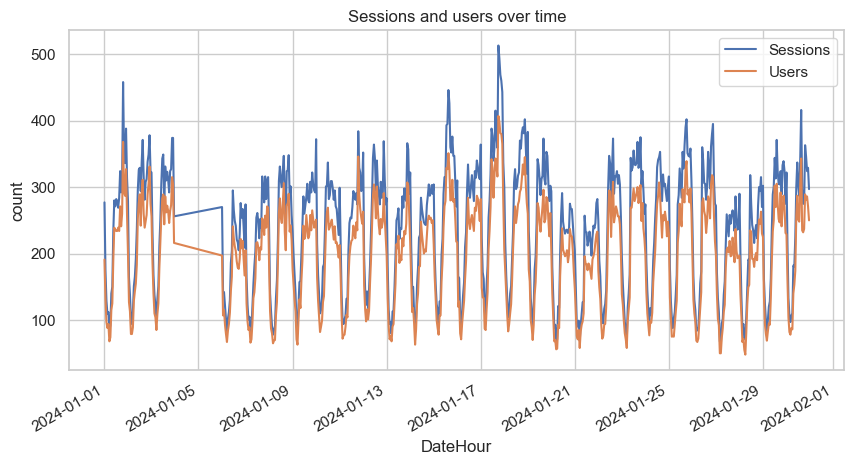

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
df.groupby("DateHours")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and users over time")
plt.xlabel("DateHour")
plt.ylabel("count")
plt.show()

### Q2: Which marketing channel brought the highest number of users to the website,and how can we use this insight to improve traffic from other sources? 

C:\Users\Shivam Mourya\AppData\Local\Temp\ipykernel_15612\3862736971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="channel group", y="Users", estimator=np.sum,palette="viridis")


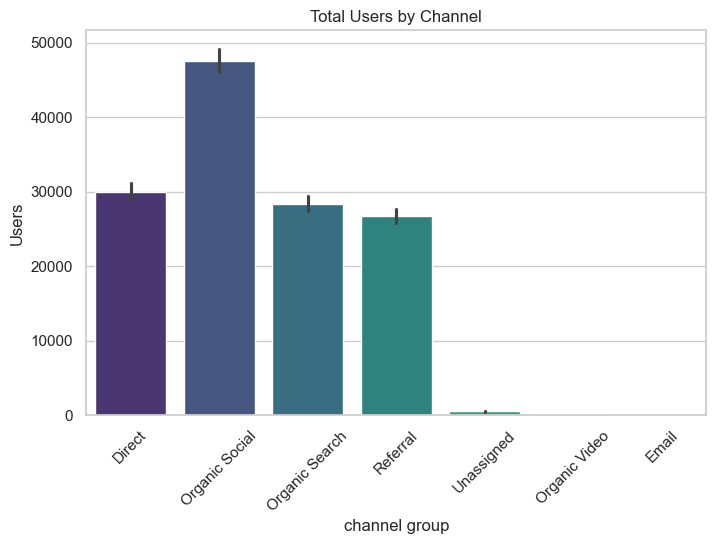

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="channel group", y="Users", estimator=np.sum,palette="viridis")
plt.title("Total Users by Channel")
plt.xticks(rotation=45)
plt.show()

### Q3: Which channel has the highest average engagement time, and what does that tell us about user behavior and content effectiveness?

C:\Users\Shivam Mourya\AppData\Local\Temp\ipykernel_15612\2132118513.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="channel group", y="Average engagement time per session",estimator=np.mean, palette="magma")


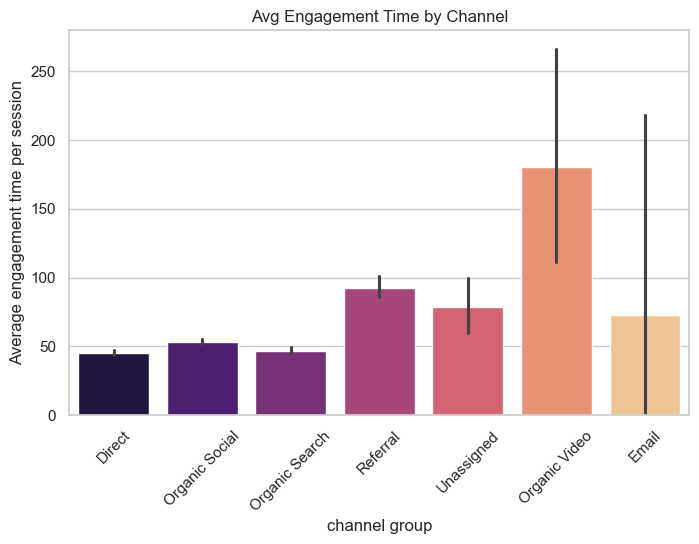

In [21]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="channel group", y="Average engagement time per session",estimator=np.mean, palette="magma")
plt.title("Avg Engagement Time by Channel")
plt.xticks(rotation=45)
plt.show()

### Q4:  How does engagement rate vary across different traffic channels?

C:\Users\Shivam Mourya\AppData\Local\Temp\ipykernel_15612\2442410513.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="channel group", y="Engagement rate", palette="coolwarm")


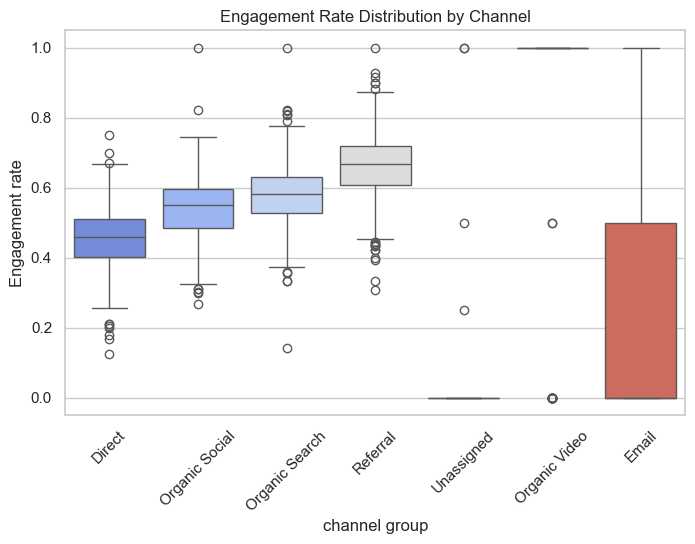

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="channel group", y="Engagement rate", palette="coolwarm")
plt.title("Engagement Rate Distribution by Channel")
plt.xticks(rotation=45)
plt.show()

### Q5:  Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels?

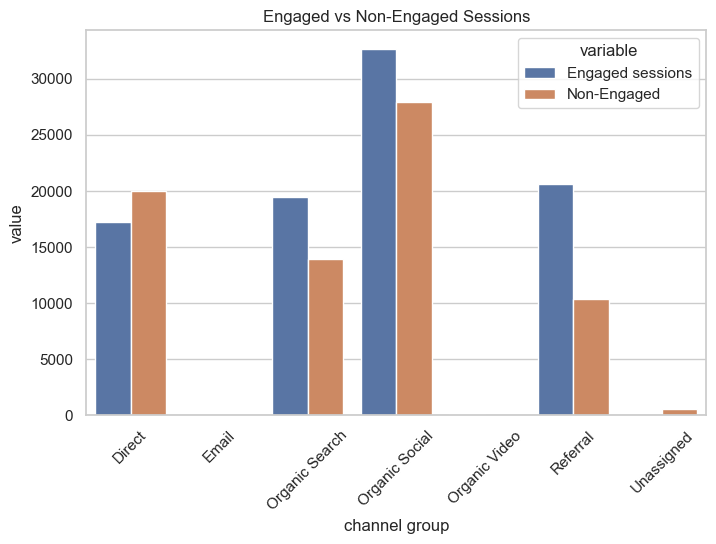

In [31]:
session_df = df.groupby("channel group")[["Sessions", "Engaged sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged sessions"]
session_df_melted = session_df.melt(id_vars="channel group", value_vars=["Engaged sessions", "Non-Engaged"])
plt.figure(figsize=(8, 5))
sns.barplot(data=session_df_melted, x="channel group", y="value", hue="variable")
plt.title("Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

### Q6: At what hours of the day does each channel drive the most traffic?

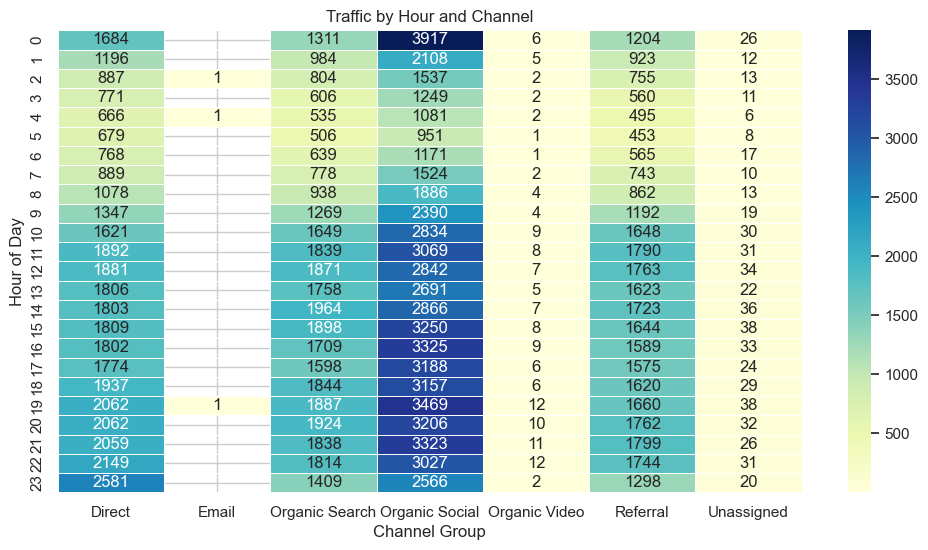

In [37]:
heatmap_data = df.groupby(["Hour", "channel group"])["Sessions"].sum().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt='.0f')
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()

### Q7:  Is there any correlation between high traffic (sessions) and high engagement rate over time? 

Text(0.5, 1.0, 'Engagement Rate vs Sessions Over Time')

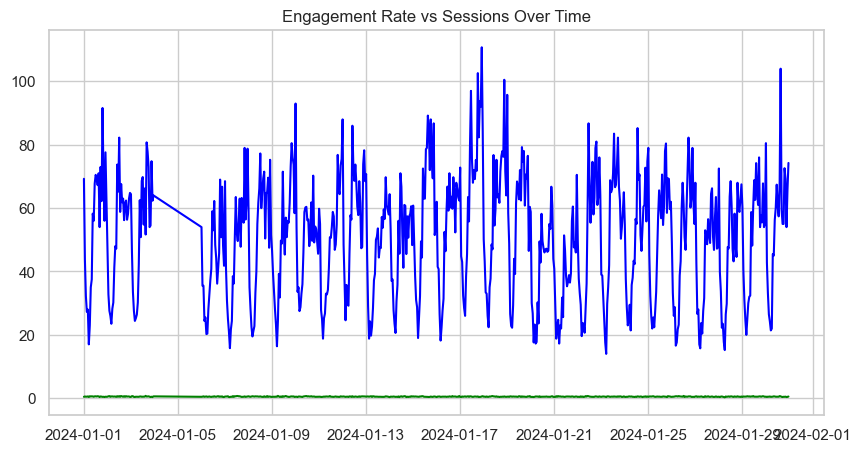

In [38]:
df_plot = df.groupby("DateHours")[["Engagement rate", "Sessions"]].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(df_plot["DateHours"], df_plot["Engagement rate"], label="Engagement rate", color="green")
plt.plot(df_plot["DateHours"], df_plot["Sessions"], label="Sessions", color="blue")
plt.title("Engagement Rate vs Sessions Over Time")

## By- Shivam Mourya